In [ ]:
First install Miniconda to install RDKIT in colab 

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local


--2021-11-23 11:24:56--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  61.5MB/s    in 1.3s    

2021-11-23 11:24:58 (61.5 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37

In [2]:
! conda install -c rdkit rdkit -y

Solving environment: \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |            1_gnu          22 KB
    blas-1.0                   |              mkl           6 KB
    bottleneck-1.3.2           |   py37heb32a55_1         125 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2021.10.26 |       h06a4308_2         115 KB
    cairo-1.16.0               |       hf32fb01_1         1.0 MB
    certifi-2021.10.8          |   py37h06a4308_0         151 KB
    conda-4.10.3               |   py37h06a4308_0         2.9 MB
    fontconfig-2.13.1          |       h6c09931_0         250 KB
    freetype-2.11.0            |       h70c0345_0         618 KB
    giflib-5.2.1               |    

In [3]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [52]:
# from drugbank
import requests
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

IPythonConsole.ipython_useSVG=True  

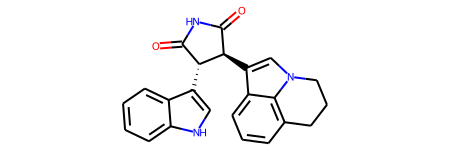

In [24]:
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

Here by using RDkit Chem lib mol from block function and draw a morphine mol 

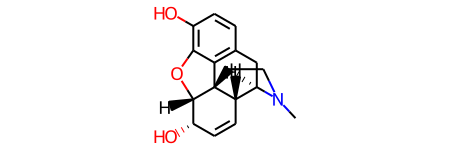

In [32]:
# url
morphine_url= 'https://go.drugbank.com/structures/small_molecule_drugs/DB00295.mol'
# API request
morphine_mol = requests.get(morphine_url).text
# conversion MOL From Block 
morphine_mol = Chem.MolFromMolBlock(morphine_mol)
morphine_mol

In [38]:
# common discriptors
print(morphine_mol.GetNumAtoms() ,morphine_mol.GetNumBonds(), morphine_mol.GetNumConformers(),   morphine_mol.GetNumHeavyAtoms())

21 25 1 21


In [44]:
# list comprehension
#  atom symbol in morphine mol
print([atom.GetSymbol() for atom in morphine_mol.GetAtoms()] )
# atom which are not in ring
print([atom.GetSymbol() for atom in morphine_mol.GetAtoms() if not atom.IsInRing()] )
# atom which are  in ring
print([atom.GetSymbol() for atom in morphine_mol.GetAtoms() if atom.IsInRing()] )


['O', 'O', 'O', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['O', 'O', 'C']
['O', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


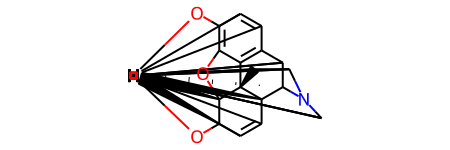

In [45]:
morphine_mol_with_hydrogens = Chem.AddHs(morphine_mol)
# add hydrgen energy non optimization
morphine_mol_with_hydrogens

In [50]:
#  energy optimization
AllChem.Compute2DCoords(morphine_mol_with_hydrogens)
morphine_mol_with_hydrogens

0

In [54]:
# descriptors is important to add numerical values to molecules for ML DL
# advance descriptors Molecular Weight

print('MolWt',Descriptors.MolWt(morphine_mol))
print('MolWt',Descriptors.MolWt(morphine_mol_with_hydrogens))



MolWt 285.34299999999996
MolWt 285.3429999999996


In [56]:
# advance descriptors Mol Log P (This is measured in LAB) this is not much relaiable
print('MolWt',Descriptors.MolLogP(morphine_mol))


MolWt 1.1980999999999997


In [58]:
# This is important for Drug discovery
# less rigid molecule this is important 
# asses a coumpound likly to be an effective drug or not
print('Num Rotatable Bonds',Descriptors.NumRotatableBonds(morphine_mol))


Num Rotatable Bonds 0


In [59]:
# Lipinsky
# Lipinski's rule of five: https://en.wikipedia.org/wiki/Lipinsk... rules of thumb
# Lipinski's rule states that, in general, an orally active drug has no more than one violation of the following criteria:[9]

# No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
# No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
# A molecular mass less than 500 daltons
# An octanol-water partition coefficient[10] (log P) that does not exceed 5
# This is an important for drug like compound